In [1]:
library(corrplot)

corrplot 0.92 loaded



### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [2]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_roots_train_dev_3.csv', h = F)
dim(gum.all)

[1] 6507  768

In [3]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [4]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [5]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

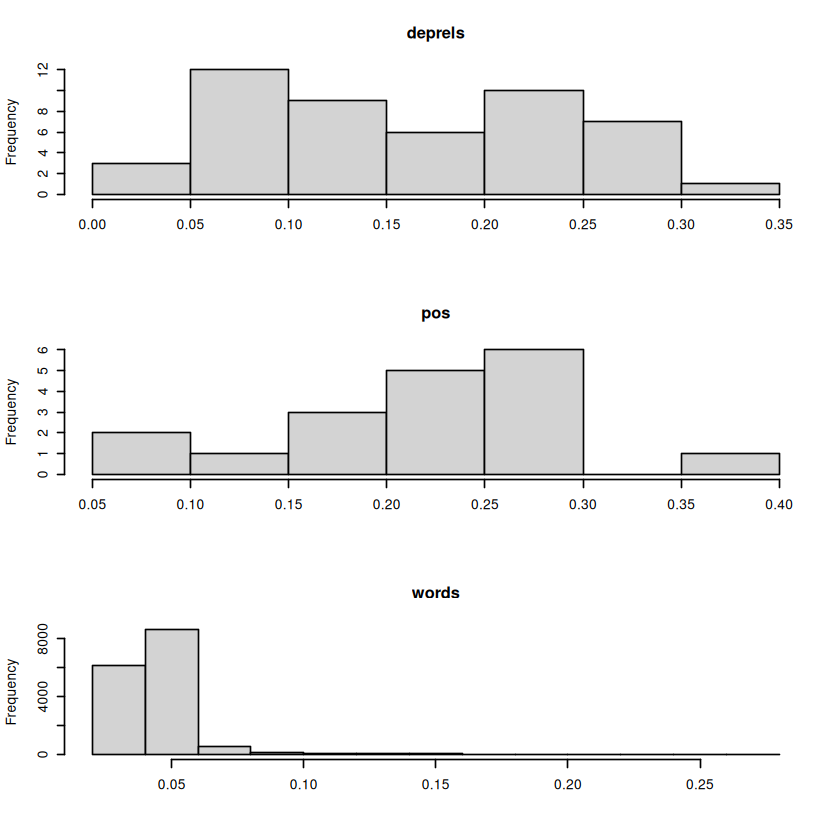

In [8]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

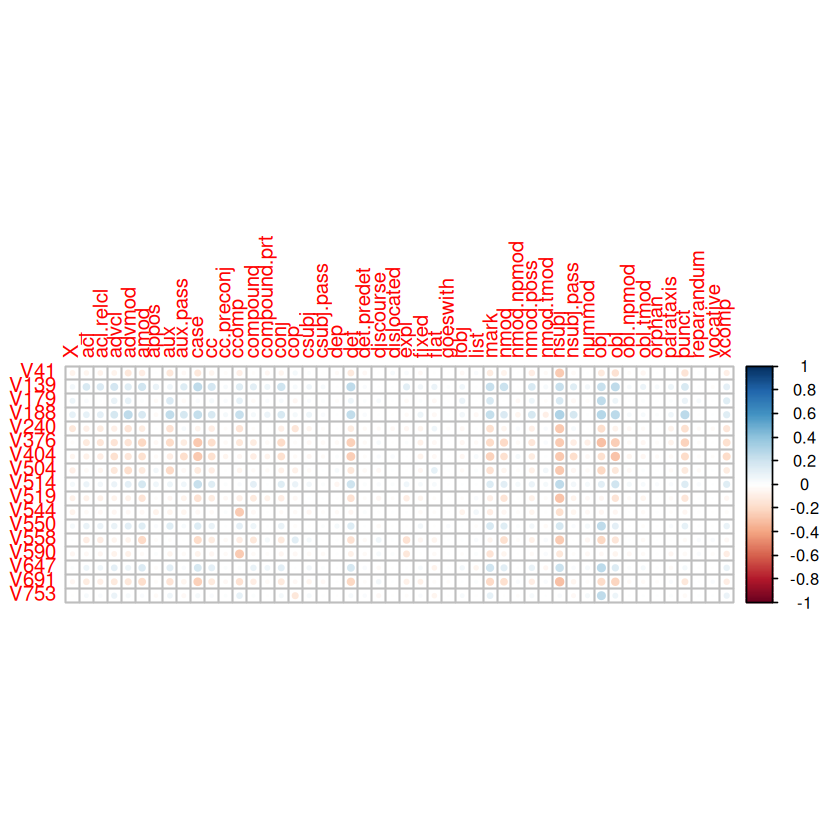

In [9]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.25)
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,])

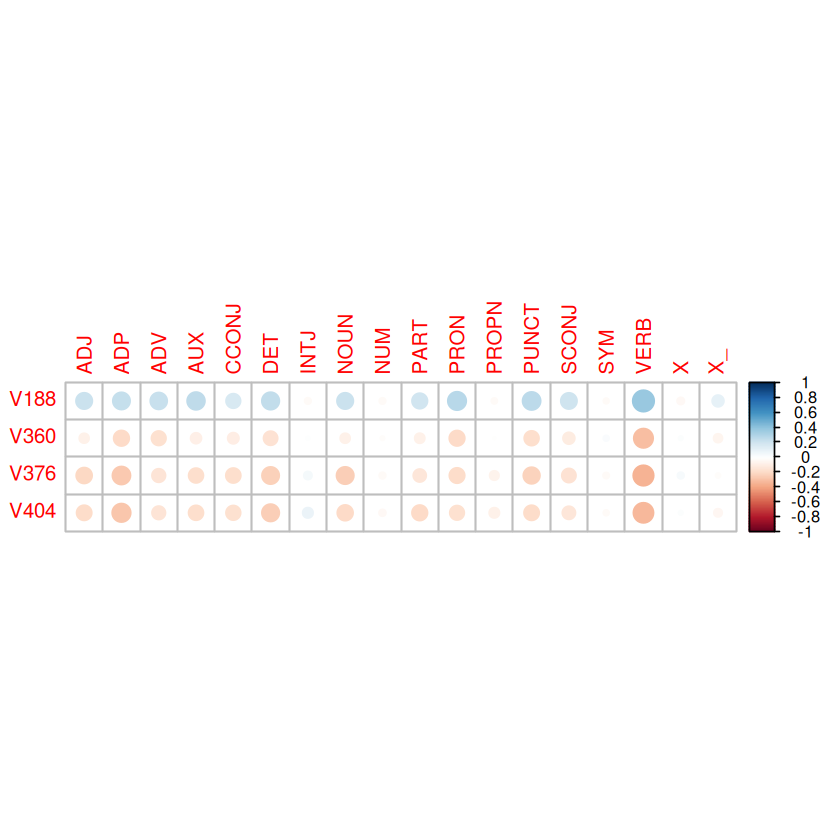

In [12]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.3)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,])

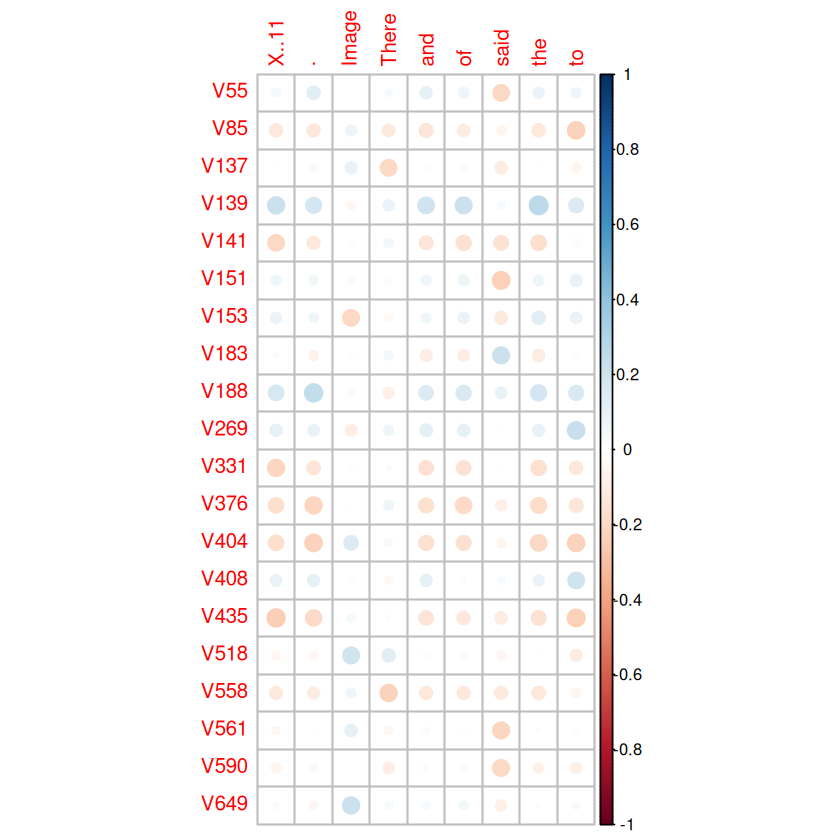

In [13]:
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.2)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.2)
corrplot(gum.pooler.cor.words[prominent.neurons.words,prominent.words])

In [14]:
gum.pooler.pca <- prcomp(gum.all)

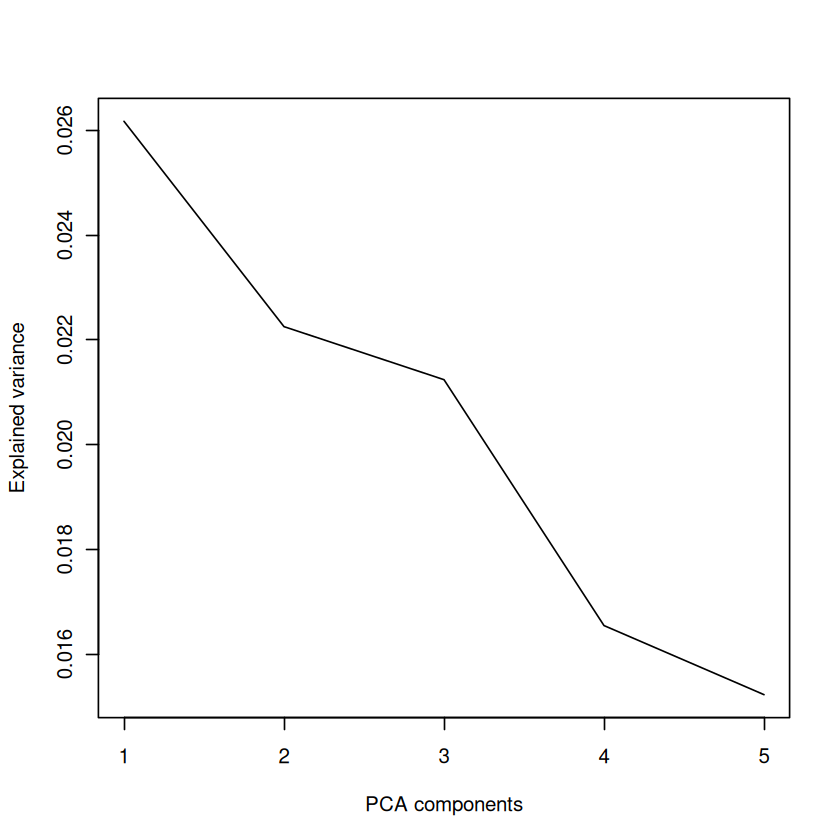

In [15]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [16]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [17]:
show.sentences <- function(sentences, sep='\n\n') {
    for (s in sentences) {
        cat(s); cat(sep)
    }
}

### First principal component

Minimum values: ???

In [26]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=50)], '\n\n')

Many times prideful people have a serious ' my-way's-the-only-way ' attitude .

Anyway , you do n't have a choice on how you get there , unless you happen to own an aeroplane .

Prideful people have a strong need to look good , and being self-sufficient is an effective way to do that .

We do n’t have any rules or known lines we wo n’t cross .

I do n't have enough information to answer this question , one way or the other .

The clans did n't have any stories about coming from Earth .

Most of the rooms at these hotels have their own bathroom , but there are a few rooms at the Hafijj Hotel and Socotra Hotel that must share bathrooms .

For example , universities have a financial incentive to inflate the expertise of their academic staff , thereby increasing their rankings , bringing in grant money , and attracting students .

Okay so the fancy lipsticks have a shelf life of twelve months , so one full year .

The opening of the joke — or setup — should have a basis in the real world s

Maximum values: ???

In [19]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Loser .

Monday , March 5 , 2007

Monday , July 28 , 2014

Monday , May 18 , 2015

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Monday , March 27 , 2006

Goodbye , Ramon .



### Second principal component

Minimum values: have/get

In [20]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

Have a realistic but exaggerated setup .

I have no idea what it says , but I think they 're cough drops , so if anybody knows what this says let me know .

Have no fear , no hesitation , for Winning shall be it's reward !

Get your chickens used to humans and novelty .

Yeah you get a percentage of the amount of countries you own , and then , for continents you get another set amount .

You get a baseline from asking girls and refining profiles --

We have no way to estimate how many times we 've served it overall , but we 're now pouring around ten a night .

I have no idea .

Get masking tape or packing tape and tape screws and other little things that came out of something back against it .

We have two chairs where we can sit down and sort of enjoy the weather when it is a little bit better , um but now it 's really cold so just gon na close it .

You have a long career in poetry , but as of late the attention you have garnered is for the Mets-inspired work .

I also have a profil

Maximum values: said

In [21]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

" Pop art was about what popular American culture really thought was important " , Kathryn Waters said .

“ Snap ! ” Pete said .

“ Got any other brilliant remarks ? ” I said .

" Because Earth had lost touch with your world , the people here are very interesting to my father , " she said .

“ On his way , ” Betty said .

“ Nutcrackers , ” he said .

" Had it happened an hour later it would have been much worse , " Khaled Al-Maeena , editor at large at the Saudi Gazette , said .

" He wanted to be rich and famous and he made lots of choices to go that way " , Wilkins said .

" I study history in school , " I said .

" He 's hanging out with the celebrities , and has kind of become the same sort of celebrity he was interested in documenting earlier in his career " , Wilkins said .

" I think everybody knows Andy Warhol 's name , even non-art people , that 's a name they might know because he was such a personality " , Water said .

“ We need a plan , ” I said .

" I suspect they wo n't 

### Third principal component

Minimum values: ???

In [22]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=15)])

Monks will sometimes be aided by a layman who will accept things from women merit-makers on their behalf .

European-American settlement of the area commenced in the 1860s , and in 1911 the completion of the first of several large reservoirs in the mountains north and east of Phoenix insured its success as a center for irrigation-based agriculture .

The countries of the region are fully engaged in a process that will lead us clearly toward Euro-Atlantic integration and at the same time continually remove us from the extremist tendencies that caused a number of conflicts in the last decade .

The attack was launched on Wednesday by a user labelled " Anonymous " , on the website " Insurgency Wiki " , a spinoff of 4chan .

Unlike most other large Polish cities , which have long histories , Łódź was created almost from scratch during the 19th century textile industry boom to house textile mills , their owners and their workers , and rapidly grew to become an important industrial and comme

Maximum values: I think

In [23]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

And I think I remember , a bunch of guys called because of that also .

And I just think it did n't help me seeing people at their worst at the very beginning , because all you hear is doom and gloom .

They think that modernity may endanger their tradition .

I think if I spent the night I would 've took a shower .

All in all , I think this is a terrific opportunity to improve sports coverage in a multitude of aspects ; but we will have to wait until after the event to assess to what extent the broadcasters will meet these expectations .

I think I 'll stop there .

You think so , hunh ?

So I think the first question is , what is this all about , why should we even be debating NATO , is there any reason why it should exist ?

I think .

Well I think that ’s a pretty good question ; I do n’t see why it should , I mean there happens to be no other military alliance remotely comparable — if there happened to be one I ’d be opposed to that too .

I think it ’s similar to what Colbert sa

### Fourth principal component

Mininum values: modal verbs

In [24]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=15)])

Do you think your parents will like me ? " he said .

" You 'd a never done that before , " Pag said .

" I need to pay for a damaged book , " she said .

" My father , he 's an anthropologist , " she said .

“ Perhaps I do n’t know the answers anyway ? ” said the voice .

" My father will like you , " she said .

“ And you take it out on the super , ” I said .

" My family came here from Earth , " she said .

" I study history in school , " I said .

" Can I help you ? " he said .

" What 's your name ? " Carroll said .

“ You know that ’s pretty gross … ” he said .

" What happened ? Did your dog eat it ? " he said , making a joke .

So that alarms me , because there 's quite serious potential for adverse effects and brain damage in the next generation of children born in this country , " he said .

But at the other end of the scale we 've got to make sure the people who eat a lot of food - we all know the teenage boy who comes home from school and eats a whole loaf of bread - that t

Maximum values: don't/didn't

In [27]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=50)])

Crucially , it is also desirable to retain them , even in the absence of continued practice or exposure to the L2 .

You do n’t need to have it completely memorized — in fact , you " should n’t " memorize it — but you need to be really comfortable with it , so comfortable that you can continue on with telling it even if you get nervous or sidetracked , which is very possible once you ’re in front of an audience .

I do n’t want to embarrass her .

So you do n't need to go borrow equipment from anybody , to to do the feet ?

But you know what ?

I 'm not sure which one you gave him , but there 's a brief , brief , brief IQ test there .

It 's important to use sanitary , clean tubes for your glowsticks .

We do n't want to have to give anyone permission to use our recordings , we want anyone to use them for whatever they want .

For example , husbands are likely to laugh at jokes about wives and vice versa ;

Arrogant people often subconsciously know that they do n't have any good friend